In [168]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Link to the original image \\
https://static.wikia.nocookie.net/thebate/images/b/b2/Silvie%27s_white_form_.jpg/revision/latest?cb=20210411135220

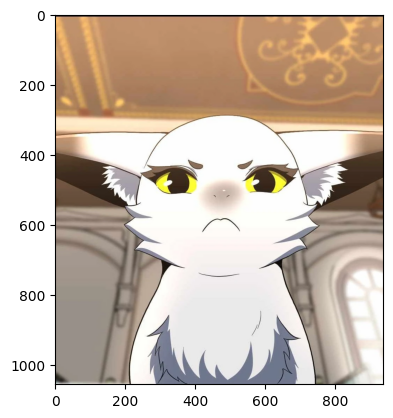

In [169]:
img = cv.imread("/content/sylv2.webp")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

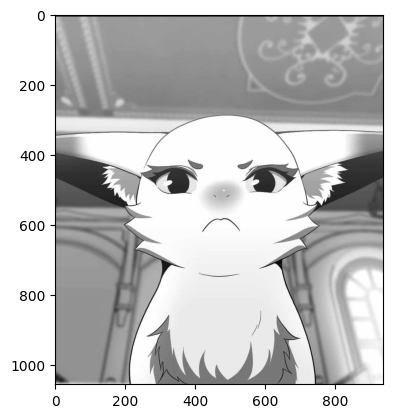

In [170]:
img = cv.imread("/content/sylv2.webp", 0)
plt.imshow(img, cmap='gray')

# Inverse

In [171]:
def inverse(image):
  return 255-image.copy()

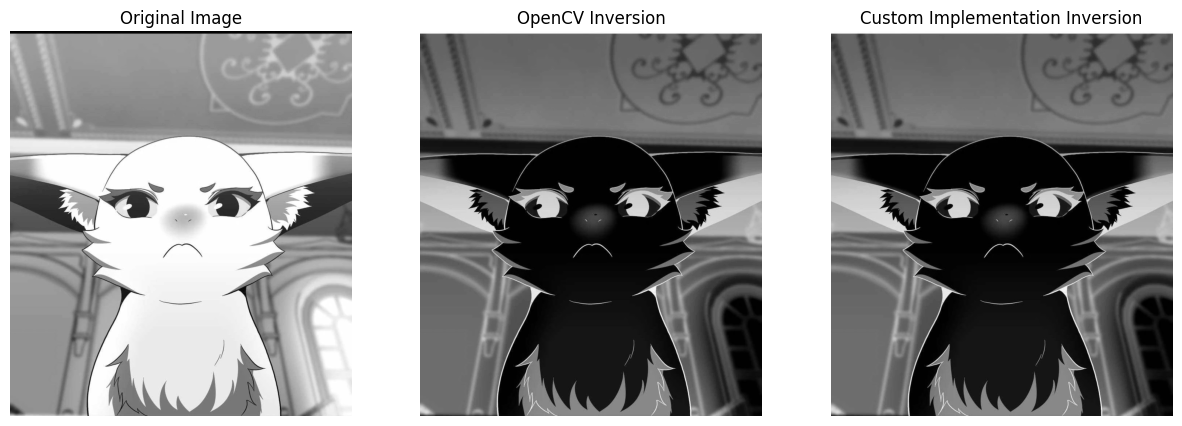

In [172]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

# Apply OpenCV's bitwise_not for inversion
cvinv = cv.bitwise_not(img)

# Apply the custom inversion function
invrt = inverse(img)  # Assuming 'inverse' is your custom function

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cvinv, cmap='gray')
axes[1].set_title('OpenCV Inversion')
axes[1].axis('off')

axes[2].imshow(invrt, cmap='gray')
axes[2].set_title('Custom Implementation Inversion')
axes[2].axis('off')

plt.show()

# Thresholding

In [173]:
def threshold(image, low, high):
  rez = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] <= low:
        rez[i][j] = 0
      if image[i][j] >= low:
        rez[i][j] = 255
  return rez

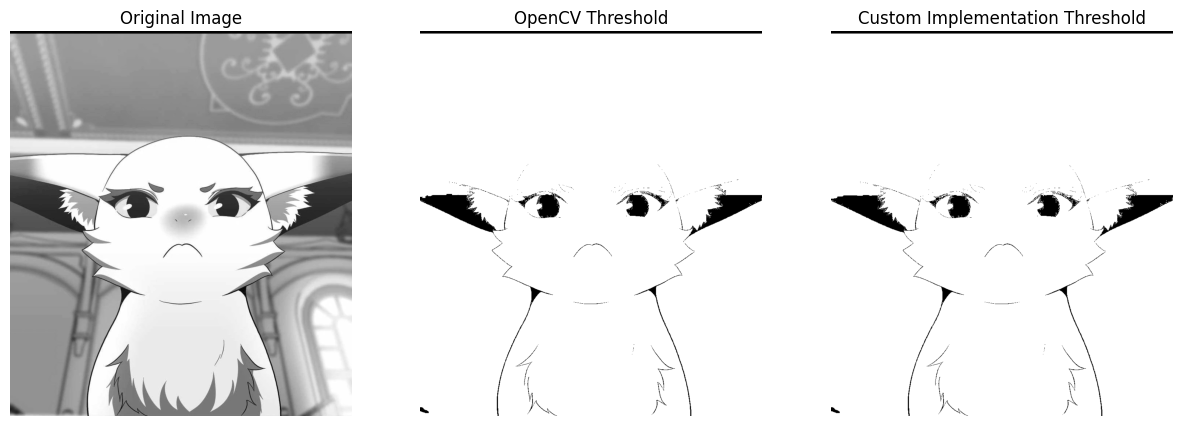

In [174]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

# Apply OpenCV's threshold function
ret, thresholded_image = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom threshold function
thrs = threshold(img, 50, 100)  # Assuming 'threshold' is your custom function

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(thresholded_image, cmap="gray")
axes[1].set_title('OpenCV Threshold')
axes[1].axis('off')

axes[2].imshow(thrs, cmap="gray")
axes[2].set_title('Custom Implementation Threshold')
axes[2].axis('off')

plt.show()

# Quantization

In [175]:
def quantize(image, numberOfLevels):
    assert numberOfLevels > 0, "numberOfLevels must be greater than 0"

    # Initialize the result image
    res = np.zeros_like(image)

    # Determine the step size based on the number of levels
    step = 1.0 / numberOfLevels

    for level in range(numberOfLevels):
        lower_bound = level * step
        upper_bound = (level + 1) * step
        if level == numberOfLevels - 1:
            # Ensure that the last level includes the upper bound
            res[(image >= lower_bound) & (image <= upper_bound)] = level / (numberOfLevels - 1)
        else:
            res[(image >= lower_bound) & (image < upper_bound)] = level / (numberOfLevels - 1)

    return res

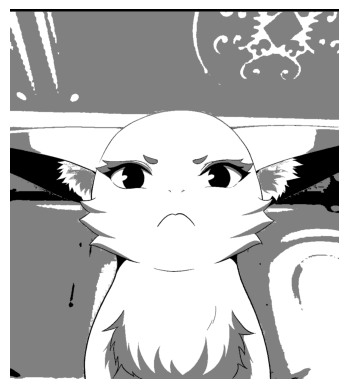

In [176]:
img = cv.imread("/content/sylv2.webp", 0)
img = img.astype(np.float32) / 255
quant = quantize(img, 3)

plt.axis('off')
plt.imshow(quant,cmap='gray')

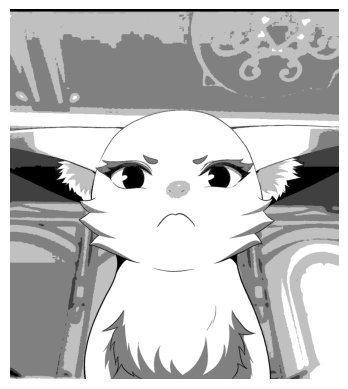

In [177]:
img = cv.imread("/content/sylv2.webp", 0)
img = img.astype(np.float32) / 255
quant = quantize(img, 5)

plt.axis('off')
plt.imshow(quant,cmap='gray')

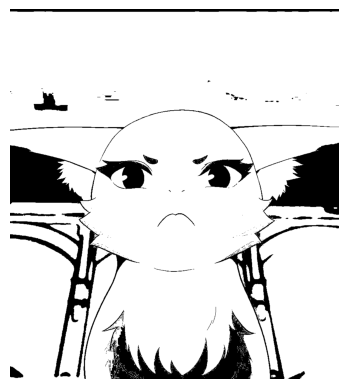

In [178]:
img = cv.imread("/content/sylv2.webp", 0)
img = img.astype(np.float32) / 255
quant = quantize(img, 2)

plt.axis('off')
plt.imshow(quant,cmap='gray')

# Normalization

In [179]:
def normalize(image, minValue, maxValue):
    assert minValue < maxValue, "minValue must be less than maxValue"
    # Calculate the range of the image and desired output range
    fmin = np.min(image)
    fmax = np.max(image)
    # Avoid division by zero
    if fmin == fmax:
        return np.full(image.shape, minValue, dtype=np.uint8)
    # Perform the normalization
    scale = (maxValue - minValue) / (fmax - fmin)
    rez = scale * (image - fmin) + minValue
    # Clip values to ensure they remain within the target range and convert to uint8
    rez = np.clip(rez, minValue, maxValue).astype(np.uint8)
    return rez

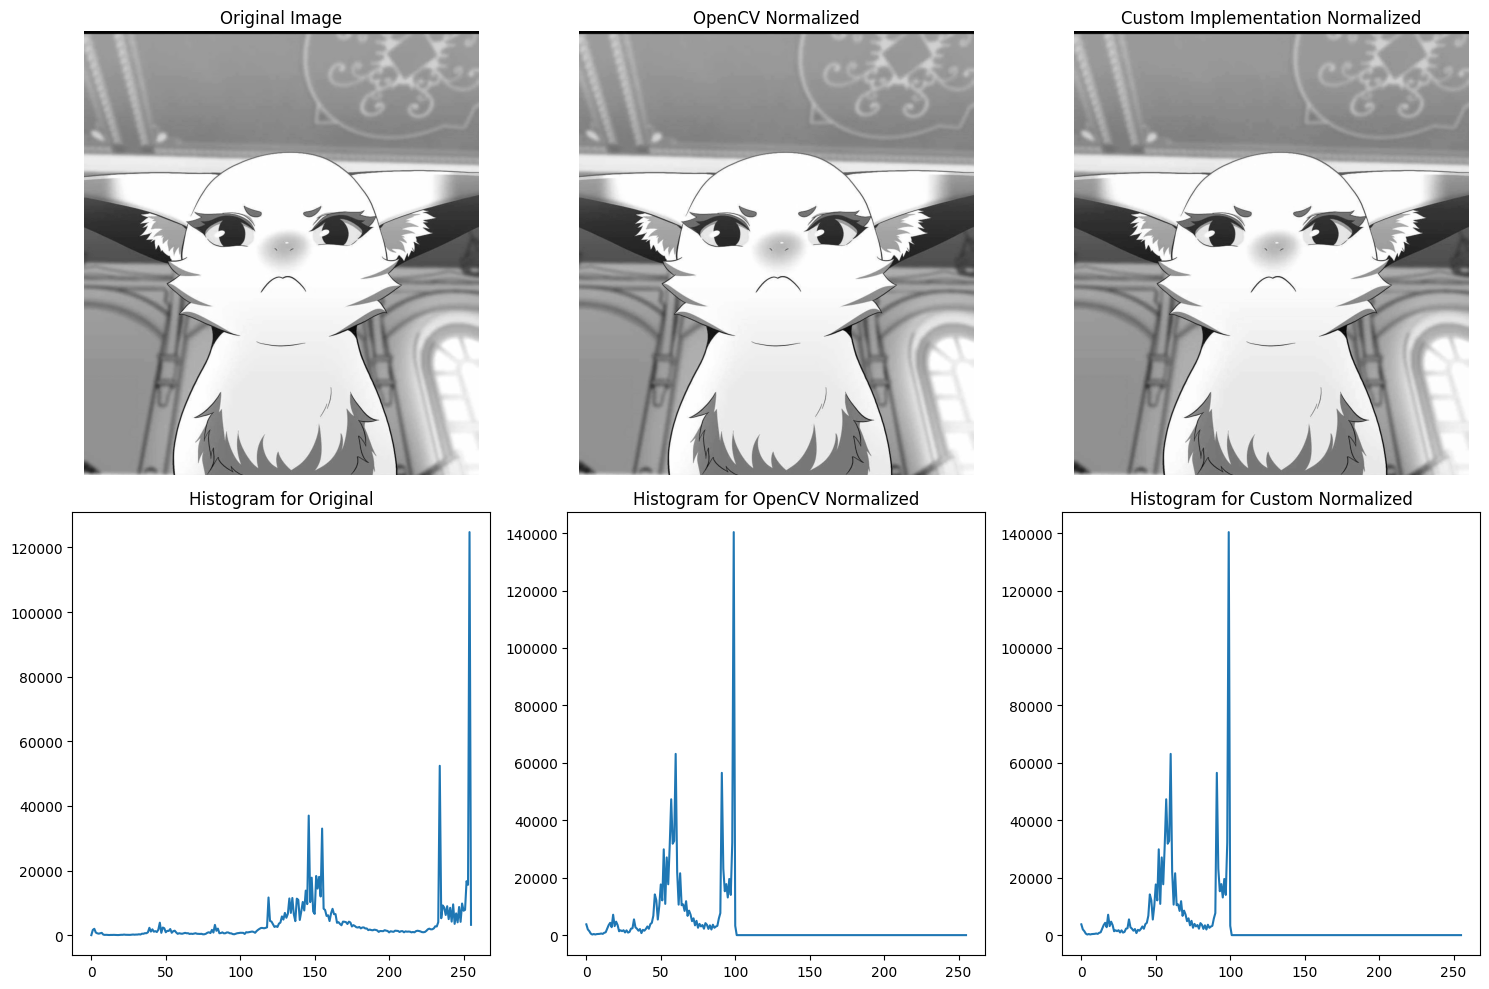

In [180]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

hist0 = cv.calcHist([img], [0], None, [256], [0, 256])

# Apply OpenCV's normalization
normalized_image = cv.normalize(img.astype(np.float32), None, alpha=0, beta=100, norm_type=cv.NORM_MINMAX)

# Calculate histogram for the OpenCV normalized image
hist1 = cv.calcHist([normalized_image], [0], None, [256], [0, 256])

# Apply the custom normalization function
thrs = normalize(img, 0, 100)  # Assuming 'normalize' is your custom function

# Calculate histogram for the custom normalized image
hist2 = cv.calcHist([thrs.astype('uint8')], [0], None, [256], [0, 256])

# Creating the plot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram for Original Image
axes[1, 0].plot(hist0)
axes[1, 0].set_title('Histogram for Original')

# OpenCV Normalized Image
axes[0, 1].imshow(normalized_image, cmap="gray")
axes[0, 1].set_title('OpenCV Normalized')
axes[0, 1].axis('off')

# Histogram for OpenCV Normalized Image
axes[1, 1].plot(hist1)
axes[1, 1].set_title('Histogram for OpenCV Normalized')

# Custom Normalized Image
axes[0, 2].imshow(thrs, cmap="gray")
axes[0, 2].set_title('Custom Implementation Normalized')
axes[0, 2].axis('off')

# Histogram for Custom Normalized Image
axes[1, 2].plot(hist2)
axes[1, 2].set_title('Histogram for Custom Normalized')

plt.tight_layout()
plt.show()

# Equalization

In [181]:
def equalize(image):
    # Calculate histogram
    hist, _ = np.histogram(image.flatten(), 256, [0,256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalize the CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())

    # Convert the masked array back to normal array
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    # Apply histogram equalization
    equalized_image = cdf[image]

    return equalized_image


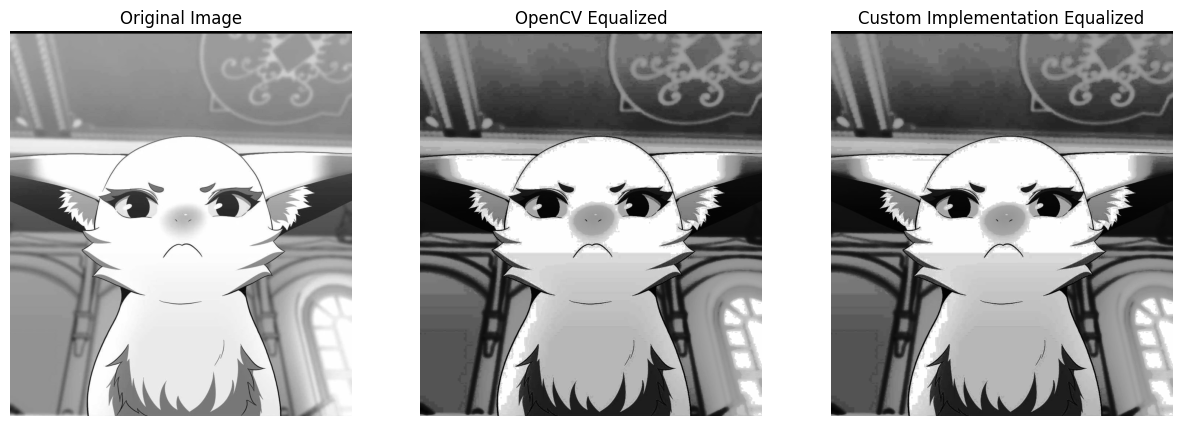

In [182]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

# Apply the custom equalization function
custom_equalized = equalize(img)

# Apply OpenCV's equalization function
opencv_equalized = cv.equalizeHist(img)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(opencv_equalized, cmap='gray')
axes[1].set_title('OpenCV Equalized')

axes[2].imshow(custom_equalized, cmap='gray')
axes[2].set_title('Custom Implementation Equalized')

for ax in axes:
    ax.axis('off')

plt.show()

# Mean Filter

In [183]:
def meanFilter(image, k):
  # check that k is odd
  assert(k%2 != 0)
  # resulting image
  result = np.zeros((image.shape[0], image.shape[1]))
  # pad the image to apply the filter on it
  padding = k // 2
  padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extract the neighborhood
      neighborhood = padded[i:i + k, j:j + k]
      # Compute the mean and assign it to the corresponding pixel in the output image
      result[i, j] = np.mean(neighborhood)
  return result

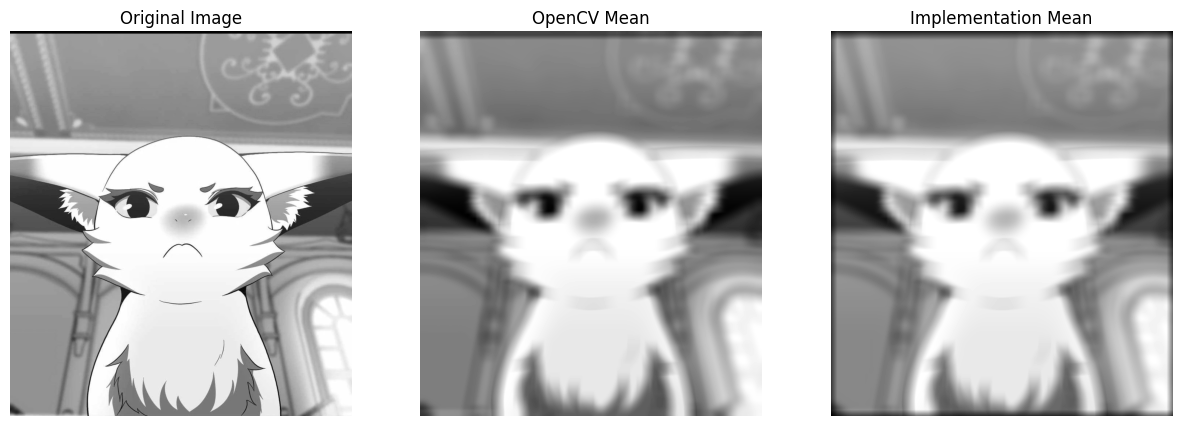

In [184]:
img = cv.imread("/content/sylv2.webp", 0)
meanerso = meanFilter(img, 35)
meanCV = cv.blur(img, (35, 35))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(meanCV, cmap="gray")
axes[1].set_title('OpenCV Mean')

axes[2].imshow(meanerso, cmap="gray")
axes[2].set_title('Implementation Mean')

for ax in axes:
    ax.axis('off')

plt.show()

# Median Filter

In [185]:
def median(image, size):
    assert size > 0
    # Get image dimensions
    image_height, image_width = image.shape
    # Create a copy of the image to store the results
    res = np.copy(image)

    # Iterate through each pixel in the image
    for y in range(image_height):
        for x in range(image_width):
            # Define the neighborhood window boundaries
            left = max(0, x - size)
            right = min(image_width, x + size + 1)
            top = max(0, y - size)
            bottom = min(image_height, y + size + 1)

            # Extract the neighborhood window
            window = image[top:bottom, left:right].flatten()
            # Sort the window to find the median
            window_sorted = np.sort(window)

            # Compute the median
            window_length = len(window_sorted)
            if window_length % 2 == 1:
                # If the window size is odd, pick the middle element
                median_value = window_sorted[window_length // 2]
            else:
                # If the window size is even, average the two middle elements
                median_value = (window_sorted[window_length // 2 - 1] + window_sorted[window_length // 2]) / 2

            # Replace the current pixel value with the median value
            res[y, x] = median_value

    return res

<ipython-input-185-99d9dbe70886>:29: RuntimeWarning: overflow encountered in scalar add
  median_value = (window_sorted[window_length // 2 - 1] + window_sorted[window_length // 2]) / 2


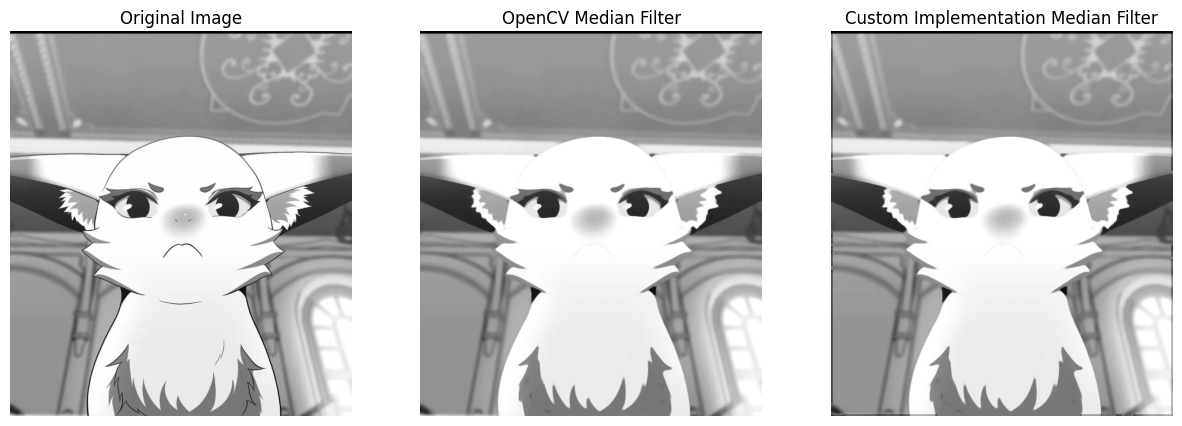

In [186]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

# Define the size of the median filter
size = 5  # This means the filter window will be 5x5 pixels

# Apply the custom median filter function
custom_median_filtered = median(img, size)

# Apply OpenCV's median filter function
opencv_median_filtered = cv.medianBlur(img, 2*size + 1)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_median_filtered, cmap="gray")
axes[1].set_title('OpenCV Median Filter')

axes[2].imshow(custom_median_filtered, cmap="gray")
axes[2].set_title('Custom Implementation Median Filter')

for ax in axes:
    ax.axis('off')

plt.show()

# Convolution

In [187]:
def convolution(image, kernel):
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Compute the padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Initialize an empty array for the output image
    convolved_image = np.zeros_like(image)

    # Perform 2D convolution
    for i in range(pad_height, image_height + pad_height):
        for j in range(pad_width, image_width + pad_width):
            # Extract the region of interest (ROI) from the padded image
            roi = padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1]
            # Apply convolution by element-wise multiplication and summation
            value = np.sum(roi * kernel)
            if value > 255:
                convolved_image[i-pad_height, j-pad_width] = 255
            elif value < 0:
                convolved_image[i-pad_height, j-pad_width] = 0
            else:
                convolved_image[i-pad_height, j-pad_width] = value

    # Cast the convolved image to uint8
    convolved_image = convolved_image.astype(np.uint8)
    return convolved_image

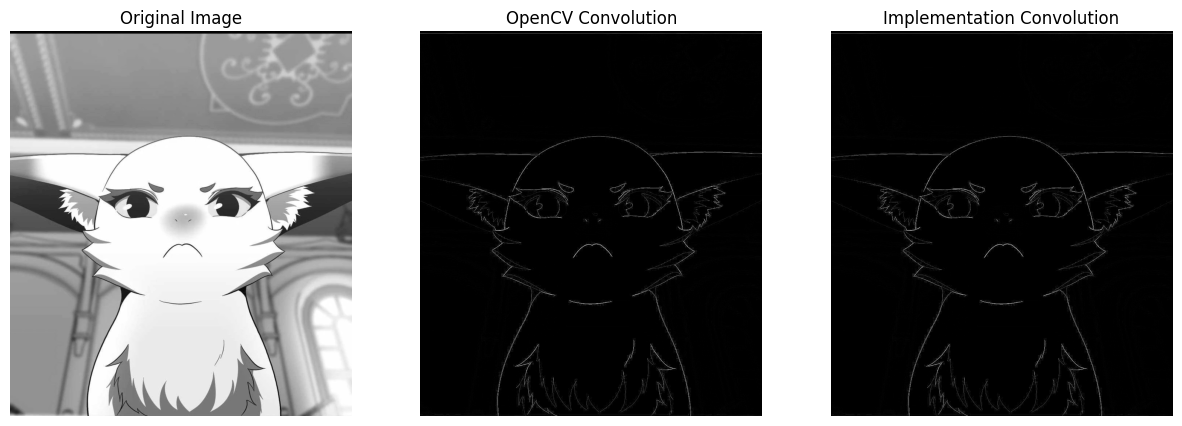

In [188]:
laplace = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
img = cv.imread("/content/sylv2.webp", 0)
implementation = convolution(img, laplace)
opencv = cv.filter2D(img, -1, laplace)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv, cmap="gray")
axes[1].set_title('OpenCV Convolution')

axes[2].imshow(implementation, cmap="gray")
axes[2].set_title('Implementation Convolution')

for ax in axes:
    ax.axis('off')

plt.show()

# Sobel Filter


In [189]:
def edgeSobel(image):
    # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    gradient_x = convolution(image, sobel_x)
    gradient_y = convolution(image, sobel_y)

    # Use the square root of the sum of squares for the gradient magnitude
    # edges = np.sqrt(np.square(gradient_x) + np.square(gradient_y))

    # Alternatively, use the sum of the absolute values for the gradient magnitude (L1 norm)
    edges = np.abs(gradient_x) + np.abs(gradient_y)

    # Ensure the edge values are within the range [0, 255]
    edges = np.clip(edges, 0, 255).astype(np.uint8)

    return edges

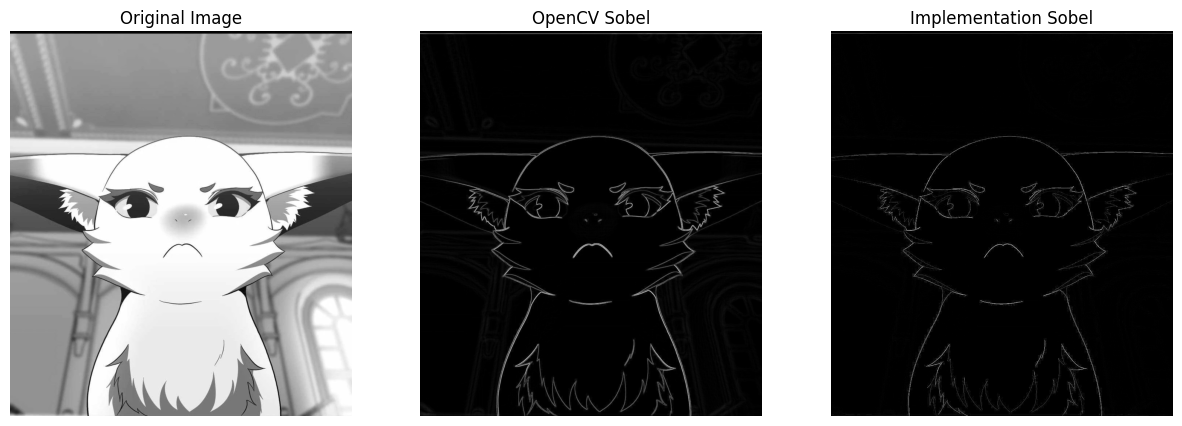

In [190]:
img = cv.imread("/content/sylv2.webp", 0)
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in y direction
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of gradients
opencv = np.abs(sobel_x) + np.abs(sobel_y)
opencv = opencv * np.max(opencv) * 255

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv, cmap="gray")
axes[1].set_title('OpenCV Sobel')

axes[2].imshow(implementation, cmap="gray")
axes[2].set_title('Implementation Sobel')

for ax in axes:
    ax.axis('off')

plt.show()

# Transpose

In [191]:
def transpose(image):
  result = image.T
  return result

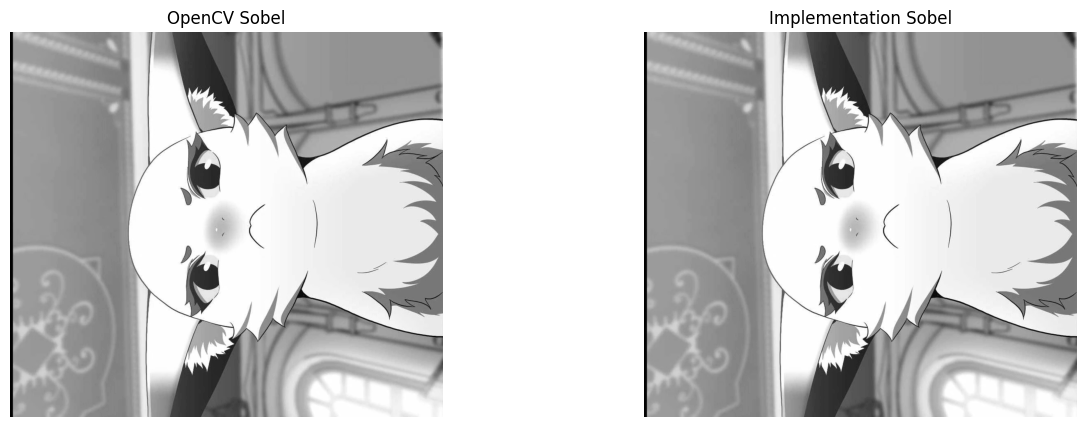

In [192]:
img = cv.imread("/content/sylv2.webp", 0)
implementation = transpose(img)
opencv = cv.transpose(img)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV Sobel')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation Sobel')

for ax in axes:
    ax.axis('off')

plt.show()

# Interpolation

In [193]:
def expand(image, factor, interpolation_function):

  assert factor > 0, "Factor must be positive"

  # Calculate output image dimensions
  new_rows = (image.shape[0] - 1) * factor
  new_cols = (image.shape[1] - 1) * factor

  res = np.zeros((new_rows, new_cols), dtype=image.dtype)

  # Iterate through each pixel
  for y in range(new_rows):
    for x in range(new_cols):
      # Calculate normalized coordinates within the original image
      y_norm = y / factor
      x_norm = x / factor

      # Apply the interpolation function to get the interpolated value
      interpolated_value = interpolation_function(image, y_norm, x_norm)

      # Set the value in the output image
      res[y, x] = interpolated_value

  return res

## Nearest neighbor interpolation

In [194]:
def interpolate_nearest(image, y, x):

  # Handle edge cases (coordinates outside image bounds)
  if y < 0 or y >= image.shape[0] or x < 0 or x >= image.shape[1]:
    return 0  # Return black for out-of-bounds pixels

  # Round coordinates to nearest integer indices
  y_int = int(round(y))
  x_int = int(round(x))

  # Extract the nearest neighbor pixel value
  return image[y_int, x_int]

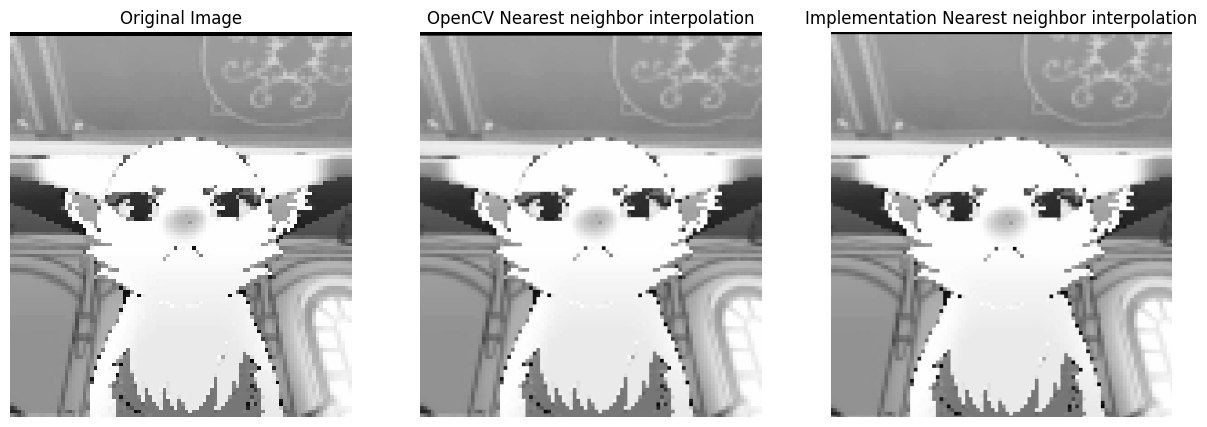

In [195]:
img = cv.imread("/content/sylv2.webp", 0)
factor = 0.1
img = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_NEAREST)
factor = 5
implementation = expand(img, factor, interpolate_nearest)
opencv = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_NEAREST)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv, cmap="gray")
axes[1].set_title('OpenCV Nearest neighbor interpolation')

axes[2].imshow(implementation, cmap="gray")
axes[2].set_title('Implementation Nearest neighbor interpolation')

for ax in axes:
    ax.axis('off')

plt.show()

## Bilinear interpolation

In [196]:
def interpolate_bilinear(image, y, x):

  # Handle edge cases
  if y < 0 or y >= image.shape[0] or x < 0 or x >= image.shape[1]:
    return 0

  # Get integer coordinates of the surrounding pixels
  y0 = int(np.floor(y))
  x0 = int(np.floor(x))
  y1 = y0 + 1
  x1 = x0 + 1

  # Check for edge cases
  if y1 >= image.shape[0]:
    y1 = image.shape[0] - 1
  if x1 >= image.shape[1]:
    x1 = image.shape[1] - 1

  # Calculate weights for interpolation
  t = y - y0
  u = x - x0

  value = (1 - t) * (1 - u) * image[y0, x0] + \
          (1 - t) * u * image[y0, x1] + \
          t * (1 - u) * image[y1, x0] + \
          t * u * image[y1, x1]

  return value

Text(0.5, 1.0, 'Implementation')

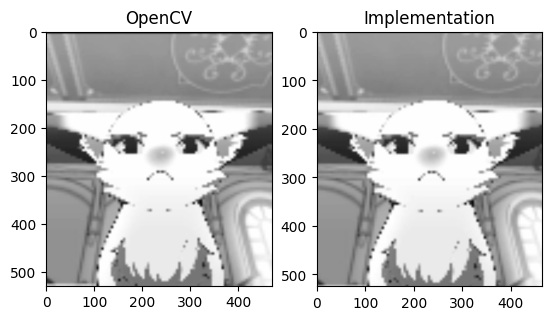

In [197]:
img = cv.imread("/content/sylv2.webp", 0)
factor = 0.1
img = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_LINEAR)
factor = 5
implementation = expand(img, factor, interpolate_bilinear)
opencv = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_LINEAR)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')

# Dilatation

In [198]:
def dilate(image, structuring_element):
    # Find the dimensions of the image and structuring element
    image_height, image_width = image.shape
    se_height, se_width = structuring_element.shape

    # Calculate offsets
    offset_y = se_height // 2
    offset_x = se_width // 2

    # Create a padded image to handle edge cases
    padded_image = np.zeros((image_height + 2*offset_y, image_width + 2*offset_x))
    padded_image[offset_y:offset_y+image_height, offset_x:offset_x+image_width] = image

    # Initialize the result image
    result = np.zeros_like(image)

    # Perform dilation
    for y in range(image_height):
        for x in range(image_width):
            # Extract the current region of interest
            current_region = padded_image[y:y+se_height, x:x+se_width]
            # Apply the structuring element: maximum value in the region of interest
            result[y, x] = np.max(current_region * structuring_element)

    return result

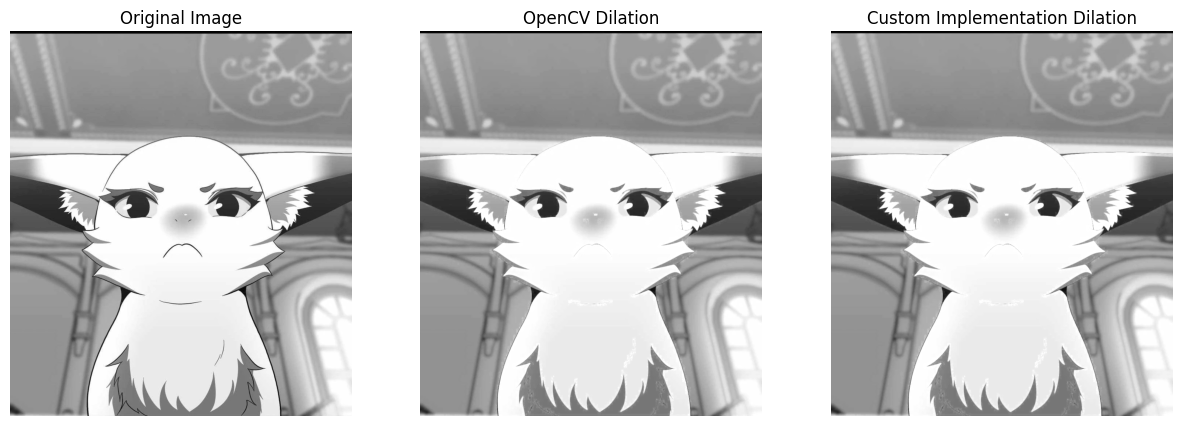

In [199]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
# ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Define your structuring element
# Example: Creating a 3x3 square structuring element
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Apply the custom dilation function
custom_dilated = dilate(img, structuring_element)

# Apply OpenCV's dilation function
opencv_dilated = cv.dilate(img, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_dilated, cmap="gray")
axes[1].set_title('OpenCV Dilation')

axes[2].imshow(custom_dilated, cmap="gray")
axes[2].set_title('Custom Implementation Dilation')

for ax in axes:
    ax.axis('off')

plt.show()

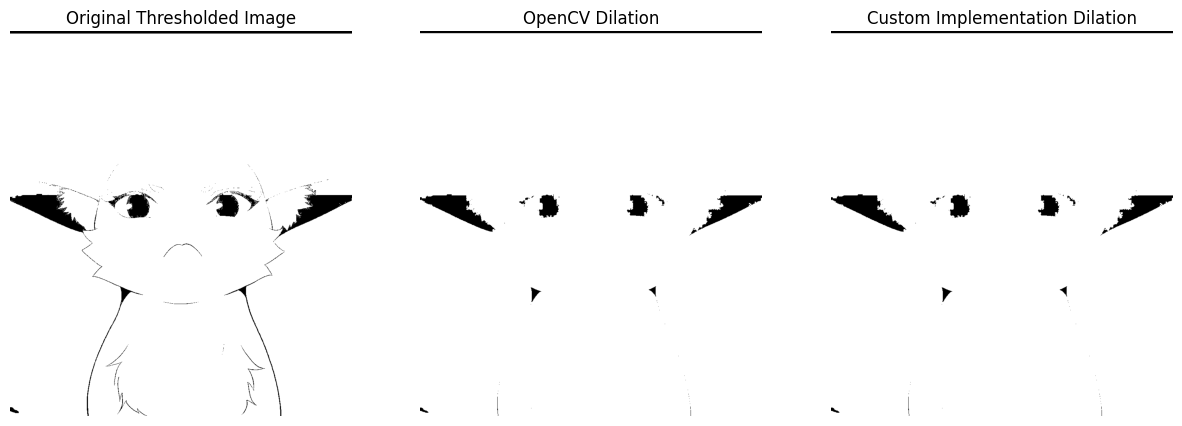

In [200]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Define your structuring element
# Example: Creating a 3x3 square structuring element
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Apply the custom dilation function
custom_dilated = dilate(img, structuring_element)

# Apply OpenCV's dilation function
opencv_dilated = cv.dilate(img, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Thresholded Image')

axes[1].imshow(opencv_dilated, cmap="gray")
axes[1].set_title('OpenCV Dilation')

axes[2].imshow(custom_dilated, cmap="gray")
axes[2].set_title('Custom Implementation Dilation')


for ax in axes:
    ax.axis('off')

plt.show()

# Erosion

In [201]:
def erode(image, structuring_element):
    # Find the dimensions of the image and structuring element
    image_height, image_width = image.shape
    se_height, se_width = structuring_element.shape

    # Calculate offsets
    offset_y = se_height // 2
    offset_x = se_width // 2

    # Create a padded image to handle edge cases
    padded_image = np.zeros((image_height + 2*offset_y, image_width + 2*offset_x))
    padded_image[offset_y:offset_y+image_height, offset_x:offset_x+image_width] = image

    # Initialize the result image
    result = np.zeros_like(image)

    # Perform erosion
    for y in range(image_height):
        for x in range(image_width):
            # Extract the current region of interest
            current_region = padded_image[y:y+se_height, x:x+se_width]
            # Apply the structuring element: minimum value in the region of interest
            result[y, x] = np.min(current_region * structuring_element + (structuring_element == 0))

    return result

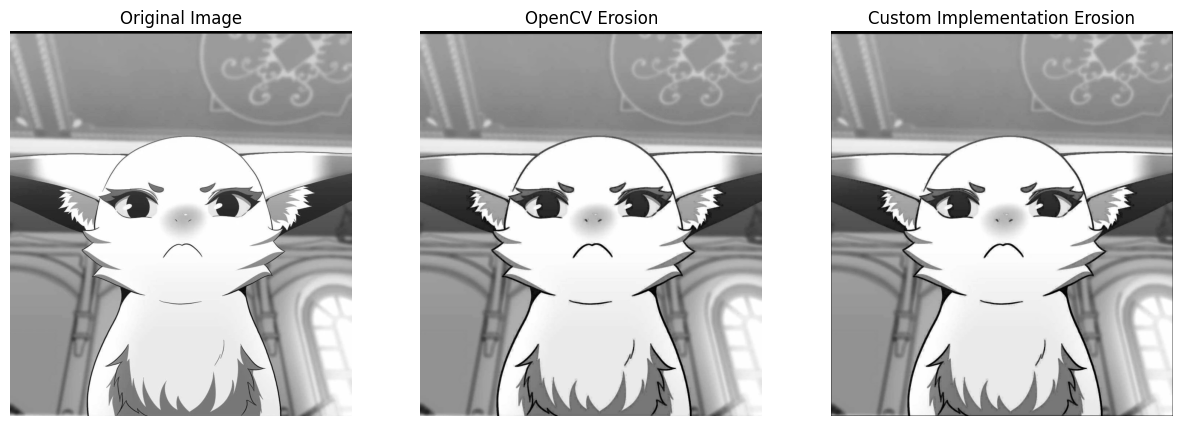

In [202]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
# ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom erosion function
custom_eroded = erode(img, structuring_element)

# Apply OpenCV's erosion function
opencv_eroded = cv.erode(img, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_eroded, cmap="gray")
axes[1].set_title('OpenCV Erosion')

axes[2].imshow(custom_eroded, cmap="gray")
axes[2].set_title('Custom Implementation Erosion')

for ax in axes:
    ax.axis('off')

plt.show()

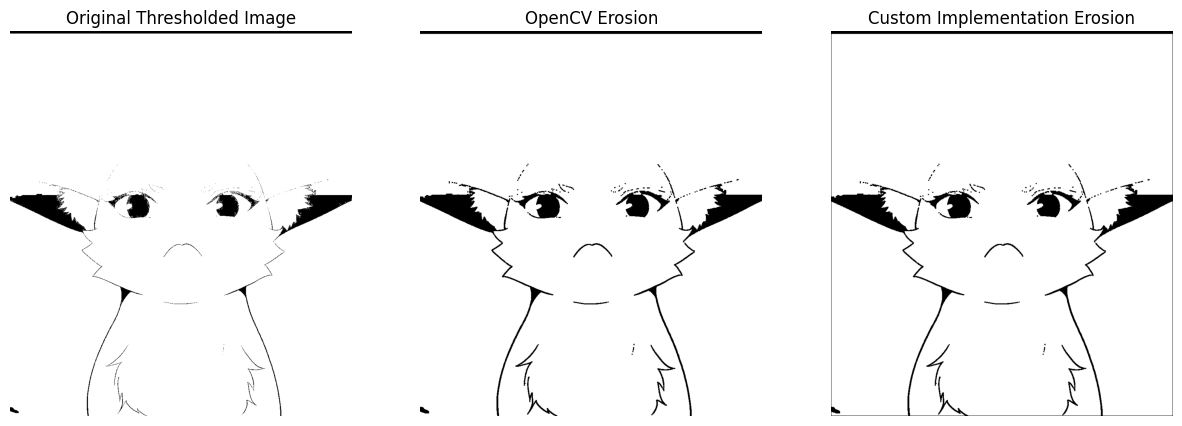

In [203]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom erosion function
custom_eroded = erode(img, structuring_element)

# Apply OpenCV's erosion function
opencv_eroded = cv.erode(img, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Thresholded Image')

axes[1].imshow(opencv_eroded, cmap="gray")
axes[1].set_title('OpenCV Erosion')

axes[2].imshow(custom_eroded, cmap="gray")
axes[2].set_title('Custom Implementation Erosion')

for ax in axes:
    ax.axis('off')

plt.show()

# Open

In [204]:
def open(image, structuring_element):
    return dilate(erode(image, structuring_element), structuring_element)

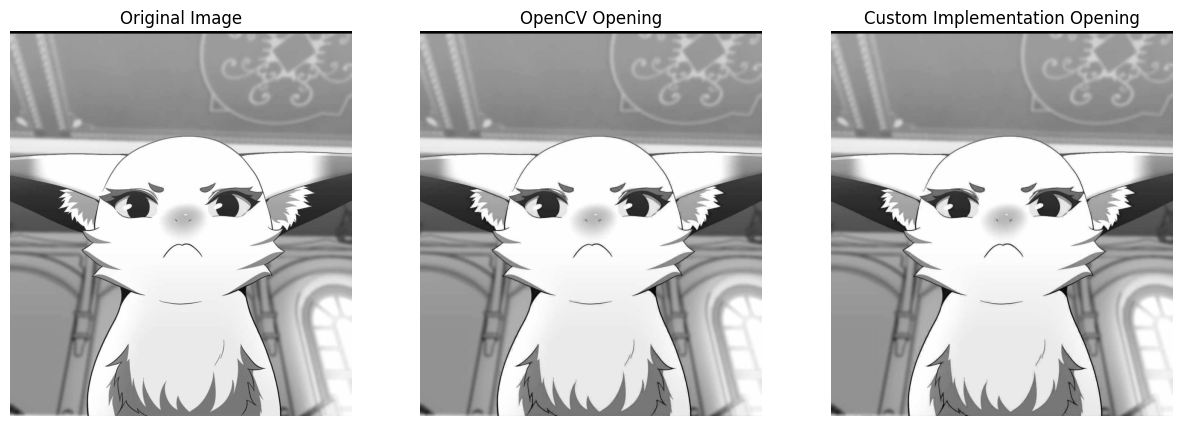

In [165]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
# ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom open function
custom_opened = open(img, structuring_element)

# Apply OpenCV's open function (morphologyEx with cv.MORPH_OPEN)
opencv_opened = cv.morphologyEx(img, cv.MORPH_OPEN, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_opened, cmap="gray")
axes[1].set_title('OpenCV Opening')

axes[2].imshow(custom_opened, cmap="gray")
axes[2].set_title('Custom Implementation Opening')

for ax in axes:
    ax.axis('off')

plt.show()

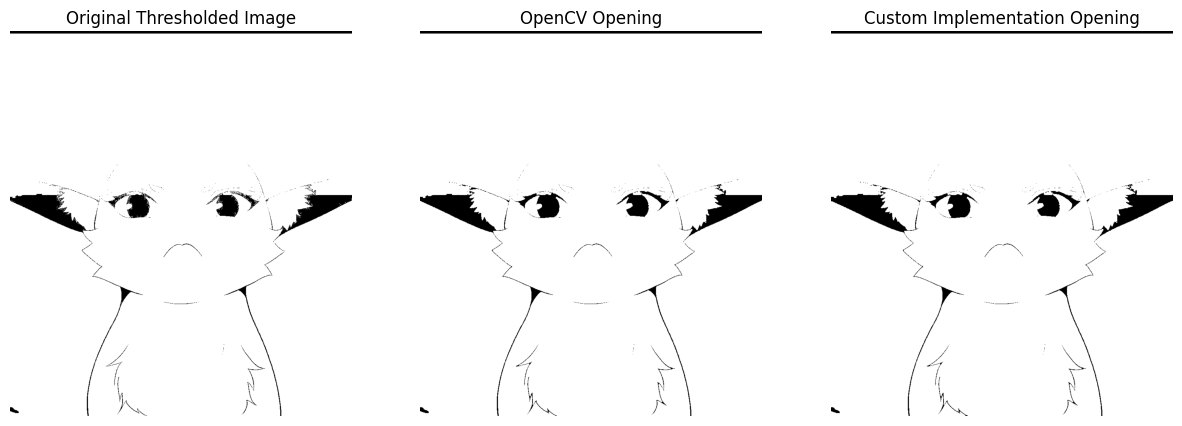

In [205]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom open function
custom_opened = open(img, structuring_element)

# Apply OpenCV's open function (morphologyEx with cv.MORPH_OPEN)
opencv_opened = cv.morphologyEx(img, cv.MORPH_OPEN, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Thresholded Image')

axes[1].imshow(opencv_opened, cmap="gray")
axes[1].set_title('OpenCV Opening')

axes[2].imshow(custom_opened, cmap="gray")
axes[2].set_title('Custom Implementation Opening')

for ax in axes:
    ax.axis('off')

plt.show()

# Close

In [206]:
def close(image, structuring_element):
    return erode(dilate(image, structuring_element), structuring_element)

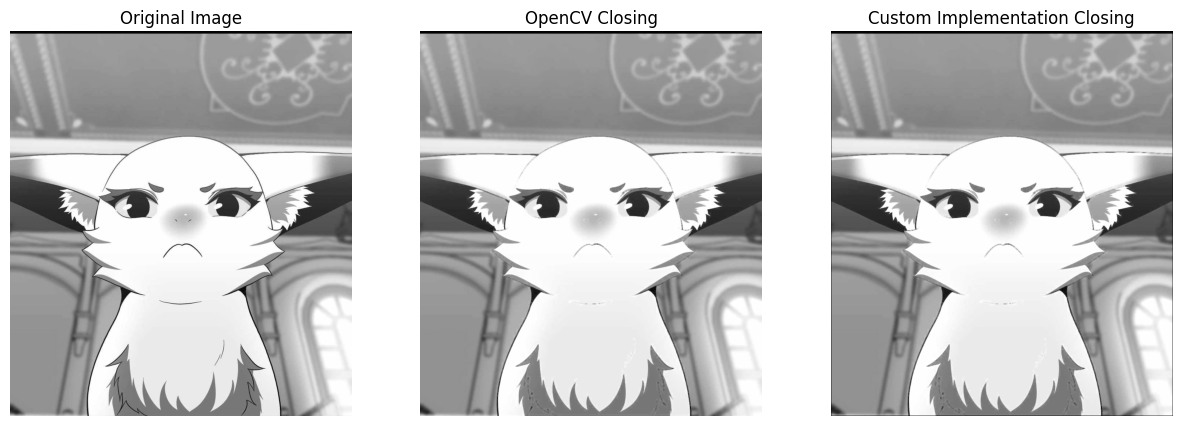

In [166]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
# ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom close function
custom_closed = close(img, structuring_element)

# Apply OpenCV's close function (morphologyEx with cv.MORPH_CLOSE)
opencv_closed = cv.morphologyEx(img, cv.MORPH_CLOSE, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_closed, cmap="gray")
axes[1].set_title('OpenCV Closing')

axes[2].imshow(custom_closed, cmap="gray")
axes[2].set_title('Custom Implementation Closing')

for ax in axes:
    ax.axis('off')

plt.show()

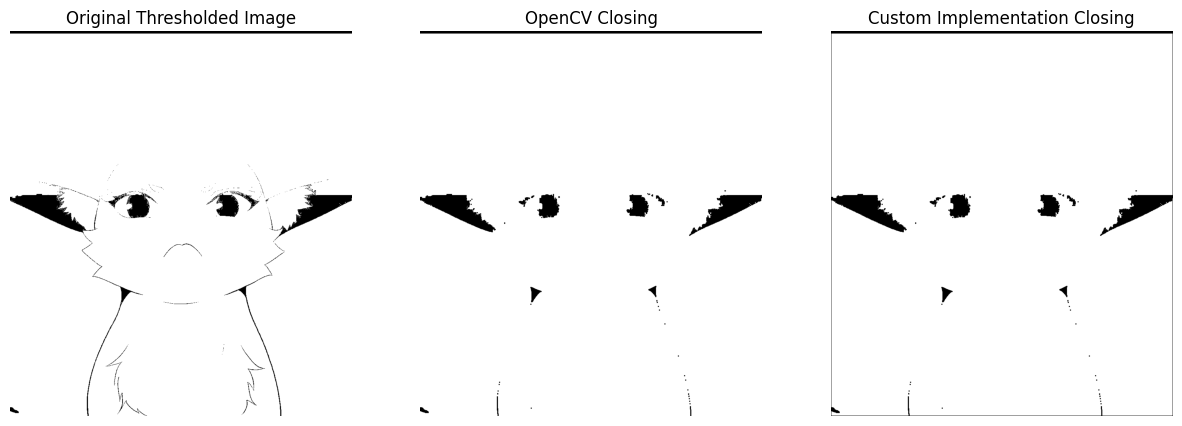

In [209]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)
ret, img = cv.threshold(img, 50, 100, cv.THRESH_BINARY)

# Apply the custom close function
custom_closed = close(img, structuring_element)

# Apply OpenCV's close function (morphologyEx with cv.MORPH_CLOSE)
opencv_closed = cv.morphologyEx(img, cv.MORPH_CLOSE, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Thresholded Image')

axes[1].imshow(opencv_closed, cmap="gray")
axes[1].set_title('OpenCV Closing')

axes[2].imshow(custom_closed, cmap="gray")
axes[2].set_title('Custom Implementation Closing')

for ax in axes:
    ax.axis('off')

plt.show()

# Morphological Gradient

In [210]:
def morphologicalGradient(image, structuring_element):
    return dilate(image, structuring_element) - erode(image, structuring_element)

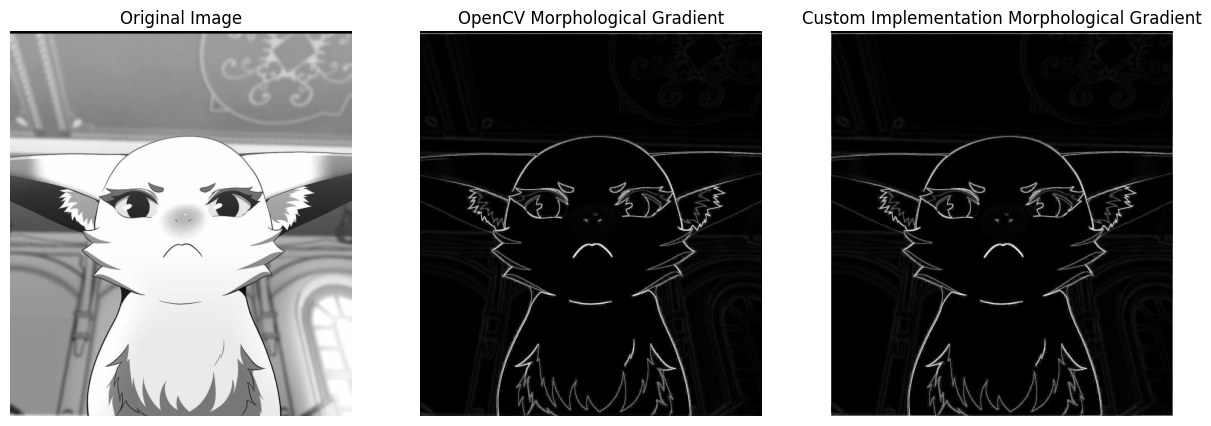

In [211]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

# Apply the custom morphological gradient function
custom_morph_gradient = morphologicalGradient(img, structuring_element)

# Apply OpenCV's morphological gradient function (morphologyEx with cv.MORPH_GRADIENT)
opencv_morph_gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, structuring_element)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(opencv_morph_gradient, cmap="gray")
axes[1].set_title('OpenCV Morphological Gradient')

axes[2].imshow(custom_morph_gradient, cmap="gray")
axes[2].set_title('Custom Implementation Morphological Gradient')

for ax in axes:
    ax.axis('off')

plt.show()

# Hit-miss

In [219]:
def hit_or_miss(image, struct_elem1, struct_elem2):

    # Erode the original image
    eroded_image = erode(image, struct_elem1)
    # Erode the complement of the image
    eroded_complement = erode(1 - image, struct_elem2)

    # Perform the intersection of both erosions to get the final result
    hit_miss_result = dilate(eroded_image & eroded_complement, struct_elem1)

    return hit_miss_result

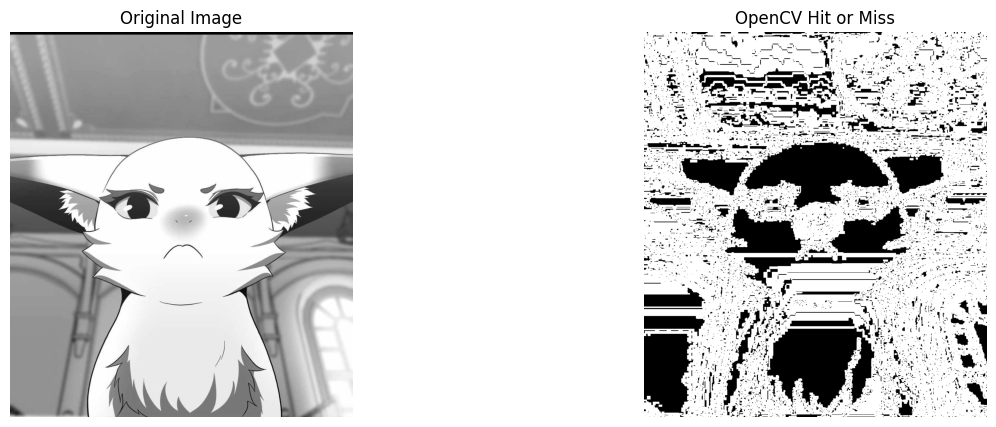

In [220]:
# Load the image in grayscale
img = cv.imread("/content/sylv2.webp", 0)

structuring_element1 = np.ones((3, 3), dtype=np.uint8)
structuring_element2 = np.zeros((3, 3), dtype=np.uint8)

# Apply the custom morphological gradient function
hitOrMiss = hit_or_miss(img, structuring_element1, structuring_element2)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(img, cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(hitOrMiss, cmap="gray")
axes[1].set_title('OpenCV Hit or Miss')

for ax in axes:
    ax.axis('off')

plt.show()